## Importing libraries

In [ ]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
X,y = make_regression(n_samples=10, n_features=1, n_informative=1, n_targets=1, noise=10, random_state=42)

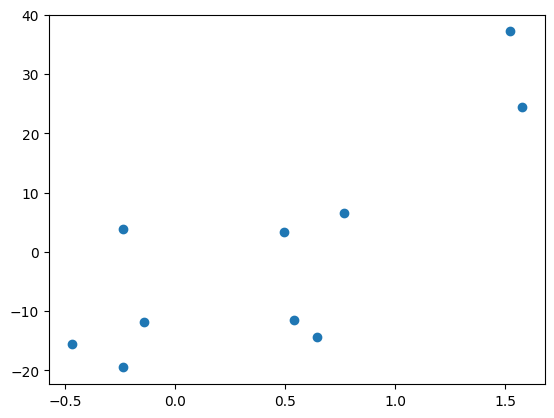

In [ ]:
plt.scatter(X,y)

## using OLS to determine value of m

In [ ]:
#Lets apply OLS for finding out the best m, then we will use GD for finding the best value of b
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X,y)

LinearRegression()

In [ ]:
model.coef_

array([20.77258429])

In [ ]:
model.intercept_

-9.03900812337926

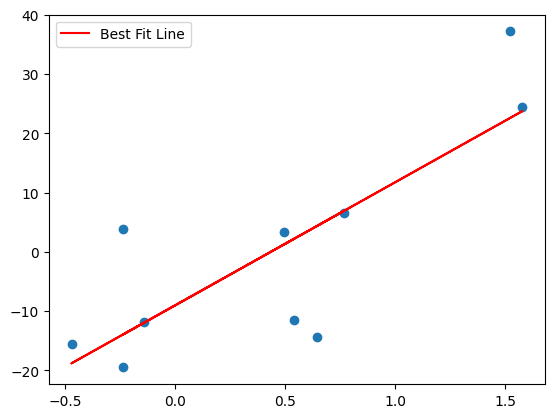

In [ ]:
plt.scatter(X,y)
plt.plot(X,model.predict(X),color='red',label="Best Fit Line")
plt.legend()

In [ ]:
#now we will use this m value for calculating b using GD
#assume our initial value of b is 0
y_pred = ((20.77 * X) + 0)

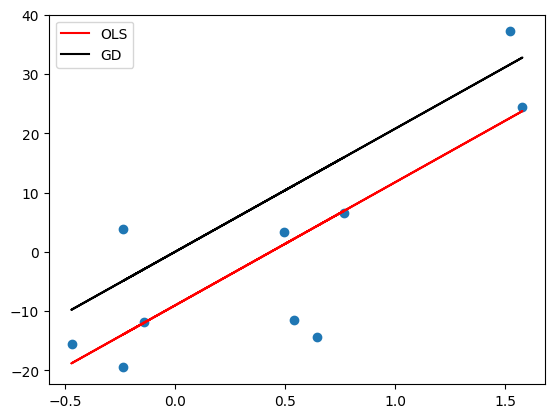

In [ ]:
plt.scatter(X,y)
plt.plot(X,model.predict(X),color='red',label='OLS')
plt.plot(X,y_pred,color='#000',label='GD')
plt.legend()

## Now taking m as a constant and finding the value of b using gradient descent

## Iteration 1

In [ ]:
m = 20.77
b = 0
loss_slope = -2 * np.sum(y - m*X.ravel() - b)
loss_slope

180.75700410768718

In [ ]:
#lets take the learning rate to be 0.03
lr = 0.03
step_size = loss_slope*lr
step_size

5.422710123230615

In [ ]:
#calculating the new intercept
b = b - step_size
b

-5.422710123230615

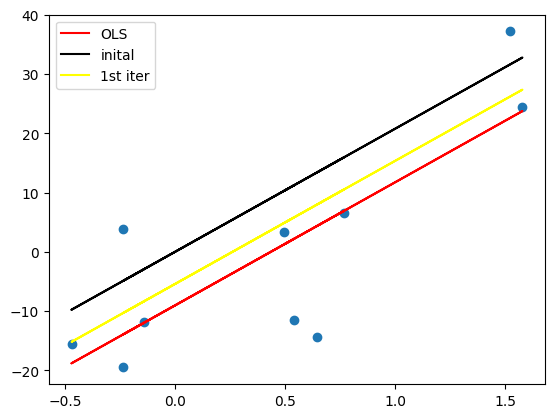

In [ ]:
y_pred1 = ((20.77 * X) + b)
plt.scatter(X,y)
plt.plot(X,model.predict(X),color='red',label='OLS')
plt.plot(X,y_pred,color='#000',label='inital')
plt.plot(X,y_pred1,color='yellow',label='1st iter')
plt.legend()

## iteration 2

In [ ]:
loss_slope = -2 * np.sum(y - m*X.ravel() - b)
loss_slope

72.30280164307486

In [ ]:
step_size = loss_slope*lr
step_size

2.1690840492922456

In [ ]:
b = b - step_size
b

-7.591794172522861

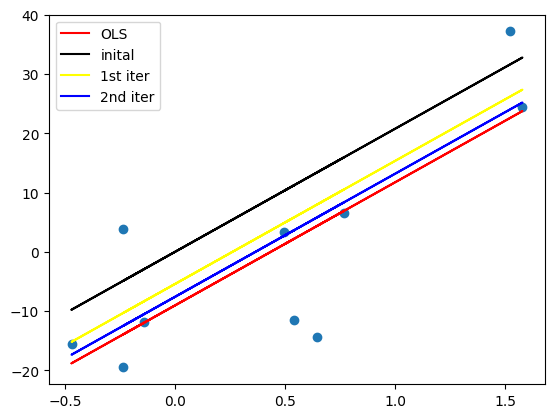

In [ ]:
y_pred2 = ((20.77 * X) + b)
plt.scatter(X,y)
plt.plot(X,model.predict(X),color='red',label='OLS')
plt.plot(X,y_pred,color='#000',label='inital')
plt.plot(X,y_pred1,color='yellow',label='1st iter')
plt.plot(X,y_pred2,color='blue',label='2nd iter')
plt.legend()

## Iteration 3

In [ ]:
loss_slope = -2 * np.sum(y - m*X.ravel() - b)
loss_slope

28.921120657229956

In [ ]:
step_size = loss_slope*lr
step_size

0.8676336197168987

In [ ]:
b = b - step_size
b

-8.45942779223976

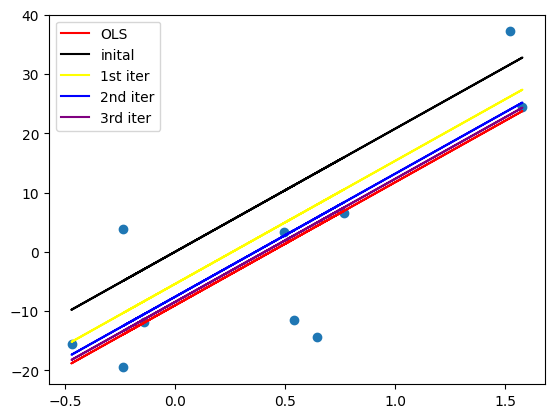

In [ ]:
y_pred3 = ((20.77 * X) + b)
plt.scatter(X,y)
plt.plot(X,model.predict(X),color='red',label='OLS')
plt.plot(X,y_pred,color='#000',label='inital')
plt.plot(X,y_pred1,color='yellow',label='1st iter')
plt.plot(X,y_pred2,color='blue',label='2nd iter')
plt.plot(X,y_pred3,color='purple',label='3rd iter')
plt.legend()

As you can see, slowly slowly our algorithm is reaching to the best fit line which is predicted by the scikit learn's Linear Regression model

## LR Model using Gradient Descent for 2D data


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [ ]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=15, random_state=15)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
X.shape

(100, 1)

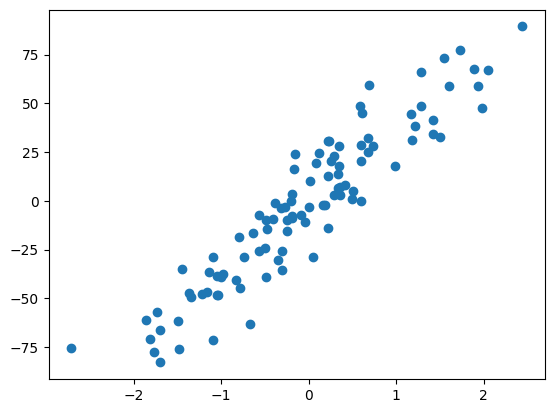

In [ ]:
plt.scatter(X,y)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
X_train.shape

(80, 1)

In [ ]:
y_train.shape

(80,)

In [ ]:
model2 = LinearRegression()

In [ ]:
model2.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred_model2 = model2.predict(X_test)

In [ ]:
r2_score(y_test,y_pred_model2)

0.8875314538312359

In [ ]:
print(model2.coef_)
print(model2.intercept_)

[36.64208975]
-0.16588786114026277


In [ ]:
#Linear Regression model using gradient descent
class GDregressor:

  def __init__(self,learning_rate,epochs):
    self.m = 100
    self.b = -120
    self.lr = learning_rate
    self.epochs = epochs


  def fit(self,X,y):
    #calculate b and m using GD
    for i in range(self.epochs):
      loss_slope_b = -2 * np.sum(y - self.m*X.ravel() - self.b) #calcuated the slope for b
      loss_slope_m = -2 * np.sum((y - self.m*X.ravel() - self.b) * X.ravel()) #calculated the slope for m
      self.b = self.b - (loss_slope_b * self.lr) #updated values
      self.m = self.m - (loss_slope_m * self.lr)
      print("m : ",self.m)


  def predict(self,X):
    return self.m * X.ravel() + self.b


In [ ]:
gd = GDregressor(0.005,15)

In [ ]:
gd.fit(X_train,y_train)

m :  39.99795299456089
m :  35.87023657850166
m :  36.229660705652776
m :  36.506119540429516
m :  36.602460911948704
m :  36.63105866166503
m :  36.639077713663916
m :  36.64127423924548
m :  36.64186978473147
m :  36.642030521094796
m :  36.64207381435198
m :  36.64208546423369
m :  36.64208859779955
m :  36.642089440498566
m :  36.64208966710283


In [ ]:
gd.m

36.64208966710283

In [ ]:
gd.b

-0.16588794961206094

In [ ]:
y_pred_GD = gd.predict(X_test)

In [ ]:
r2_score(y_test,y_pred_GD)

0.8875314542878958

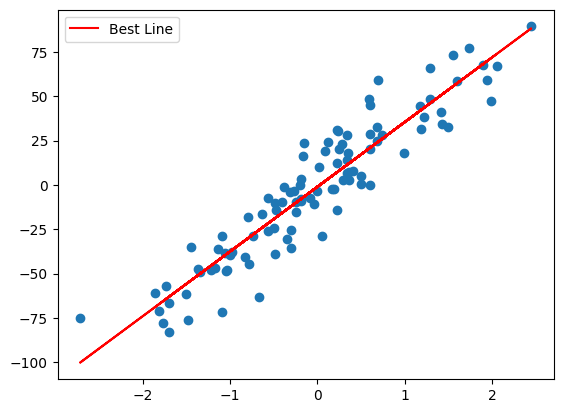

In [ ]:
plt.scatter(X,y)
plt.plot(X,gd.predict(X),color='red',label="Best Line")
plt.legend()

## LR Model using Gradient Descent for nD data

In [ ]:
from sklearn.datasets import load_diabetes
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [ ]:
X,y = load_diabetes(return_X_y=True)

In [ ]:
X.shape

(442, 10)

In [ ]:
y.shape

(442,)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
reg = LinearRegression()

In [ ]:
reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
reg.coef_

array([  -9.15865318, -205.45432163,  516.69374454,  340.61999905,
       -895.5520019 ,  561.22067904,  153.89310954,  126.73139688,
        861.12700152,   52.42112238])

In [ ]:
reg.intercept_

151.88331005254167

In [ ]:
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.4399338661568968

In [ ]:
#built my own batch regressor model
class BatchGDRegressor:

  def __init__(self, learning_rate=0.01, epochs=100):
    self.coef_ = None
    self.intercept_ = None
    self.lr = learning_rate
    self.epochs = epochs


  def fit(self,X_train,y_train):
    #firstly we will initialize all of our coefficients
    self.intercept_ = 0
    self.coef_ = np.ones(X_train.shape[1])

    #now, we will update each coefficients and intercept per epoch
    for i in range(self.epochs):
      #performed vectorization for calculating coefficients
      y_hat = np.dot(X_train,self.coef_) + self.intercept_
      intercept_der = -2 * np.mean(y_train - y_hat)
      self.intercept_ = self.intercept_ - (self.lr * intercept_der)
      coef_der = -2 * np.dot((y_train - y_hat),X_train)/X_train.shape[0]
      self.coef_ = self.coef_ - (self.lr * coef_der)

    print(self.coef_)
    print(self.intercept_)

  def predict(self,X_test):
    return np.dot(X_test,self.coef_) + self.intercept_

In [ ]:
bgdr = BatchGDRegressor(epochs=250,learning_rate=0.05)

In [ ]:
bgdr.fit(X_train,y_train)

[ 19.24621079   3.98858437  51.14938972  39.81190199  17.67509669
  13.54023581 -30.56218754  33.60493577  50.41661837  30.59672561]
150.82097152920085


In [ ]:
y_pred_bgdr = bgdr.predict(X_test)

In [ ]:
r2_score(y_test,y_pred_bgdr) #calculated the r2 score

0.12673958000281715